# Avance 8

## *Markowitz*

Codigo sacado del libro "Python para finanzas" de Carlos Mario Ramírez Gil, 2021

In [2]:
pip install pyfolio

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

### Evaluar el rendimiento de un 1/N portafolio basico


In [13]:
risky_assets = ['AAPL', 'IBM', 'MSFT']
start_date = '2017-01-01'
end_date = '2018-12-31'
n_assets = len(risky_assets)

In [14]:
prices_df = yf.download(risky_assets, start = start_date, end =  end_date)
prices_df

[*********************100%***********************]  3 of 3 completed


Adj Close                             Close              \
                 AAPL         IBM       MSFT       AAPL         IBM   
Date                                                                  
2017-01-03  27.095852  117.996841  57.375919  29.037500  159.837479   
2017-01-04  27.065521  119.457817  57.119198  29.004999  161.816437   
2017-01-05  27.203157  119.062576  57.119198  29.152500  161.281067   
2017-01-06  27.506420  119.648354  57.614296  29.477501  162.074570   
2017-01-09  27.758371  118.321518  57.430931  29.747499  160.277252   
...               ...         ...        ...        ...         ...   
2018-12-21  36.264629   85.013390  93.666153  37.682499  106.061188   
2018-12-24  35.326317   82.430939  89.756638  36.707500  102.839386   
2018-12-26  37.814053   85.358215  95.887886  39.292500  106.491394   
2018-12-27  37.568638   87.189667  96.479095  39.037498  108.776291   
2018-12-28  37.587887   86.614960  95.725784  39.057499  108.059273   

                             High                                Low  \
                  MSFT       AAPL         IBM        MSFT       AAPL   
Date                                                                   
2017-01-03   62.580002  29.082500  160.487579   62.840000  28.690001   
2017-01-04   62.299999  29.127501  162.399612   62.750000  28.937500   
2017-01-05   62.299999  29.215000  161.940720   62.660000  28.952499   
2017-01-06   62.840000  29.540001  162.447418   63.150002  29.117500   
2017-01-09   62.639999  29.857500  162.332703   63.080002  29.485001   
...                ...        ...         ...         ...        ...   
2018-12-21   98.230003  39.540001  110.210327  103.000000  37.407501   
2018-12-24   94.129997  37.887501  106.118546   97.970001  36.647499   
2018-12-26  100.559998  39.307499  106.491394  100.690002  36.680000   
2018-12-27  101.180000  39.192501  108.776291  101.190002  37.517502   
2018-12-28  100.389999  39.630001  109.751434  102.410004  38.637501   

                                        Open                          \
                   IBM       MSFT       AAPL         IBM        MSFT   
Date                                                                   
2017-01-03  158.709366  62.130001  28.950001  159.655838   62.790001   
2017-01-04  160.000000  62.119999  28.962500  160.391968   62.480000   
2017-01-05  159.904404  62.029999  28.980000  161.806885   62.189999   
2017-01-06  160.152969  62.040001  29.195000  161.271515   62.299999   
2017-01-09  160.248566  62.540001  29.487499  162.017212   62.759998   
...                ...        ...        ...         ...         ...   
2018-12-21  105.583176  97.459999  39.215000  107.552582  101.629997   
2018-12-24  102.772469  93.980003  37.037498  105.066925   97.680000   
2018-12-26  101.281075  93.959999  37.075001  103.250481   95.139999   
2018-12-27  104.655830  96.400002  38.959999  105.152962   99.300003   
2018-12-28  107.552582  99.519997  39.375000  109.196938  102.089996   

               Volume                       
                 AAPL       IBM       MSFT  
Date                                        
2017-01-03  115127600   3069278   20694100  
2017-01-04   84472400   3536944   21340000  
2017-01-05   88774400   2805686   24876000  
2017-01-06  127007600   3080993   19922900  
2017-01-09  134247600   3336635   20382700  
...               ...       ...        ...  
2018-12-21  382978400  10864279  111242100  
2018-12-24  148676800   3997184   43935200  
2018-12-26  234330000   6951507   51634800  
2018-12-27  212468400   6323698   49498500  
2018-12-28  169165600   5352905   38196300  

[501 rows x 18 columns]

In [15]:
#rendimientos dataframe
returns = prices_df['Adj Close'].pct_change().dropna()
returns

,AAPL,IBM,MSFT
Date,,,
2017-01-04,-0.001119,0.012381,-0.004474
2017-01-05,0.005085,-0.003309,0.000000
2017-01-06,0.011148,0.004920,0.008668
2017-01-09,0.009160,-0.011089,-0.003183
2017-01-10,0.001008,-0.012705,-0.000319
...,...,...,...
2018-12-21,-0.038895,-0.018404,-0.032312
2018-12-24,-0.025874,-0.030377,-0.041739
2018-12-26,0.070422,0.035512,0.068310


In [16]:
#pesos
portfolio_weights = n_assets * [1 / n_assets]
portfolio_weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [17]:
#calculo rendimientos
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index = returns.index)
portfolio_returns

Date
2017-01-04    0.002263
2017-01-05    0.000592
2017-01-06    0.008245
2017-01-09   -0.001704
2017-01-10   -0.004005
                ...   
2018-12-21   -0.029870
2018-12-24   -0.032663
2018-12-26    0.058081
2018-12-27    0.007044
2018-12-28   -0.004629
Length: 500, dtype: float64

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2017-01-04
End date,2018-12-28
Total months,23
,Backtest
Annual return,10.3%
Cumulative returns,21.4%
Annual volatility,18.1%
Sharpe ratio,0.63
Calmar ratio,0.37
Stability,0.81
Max drawdown,-27.9%


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


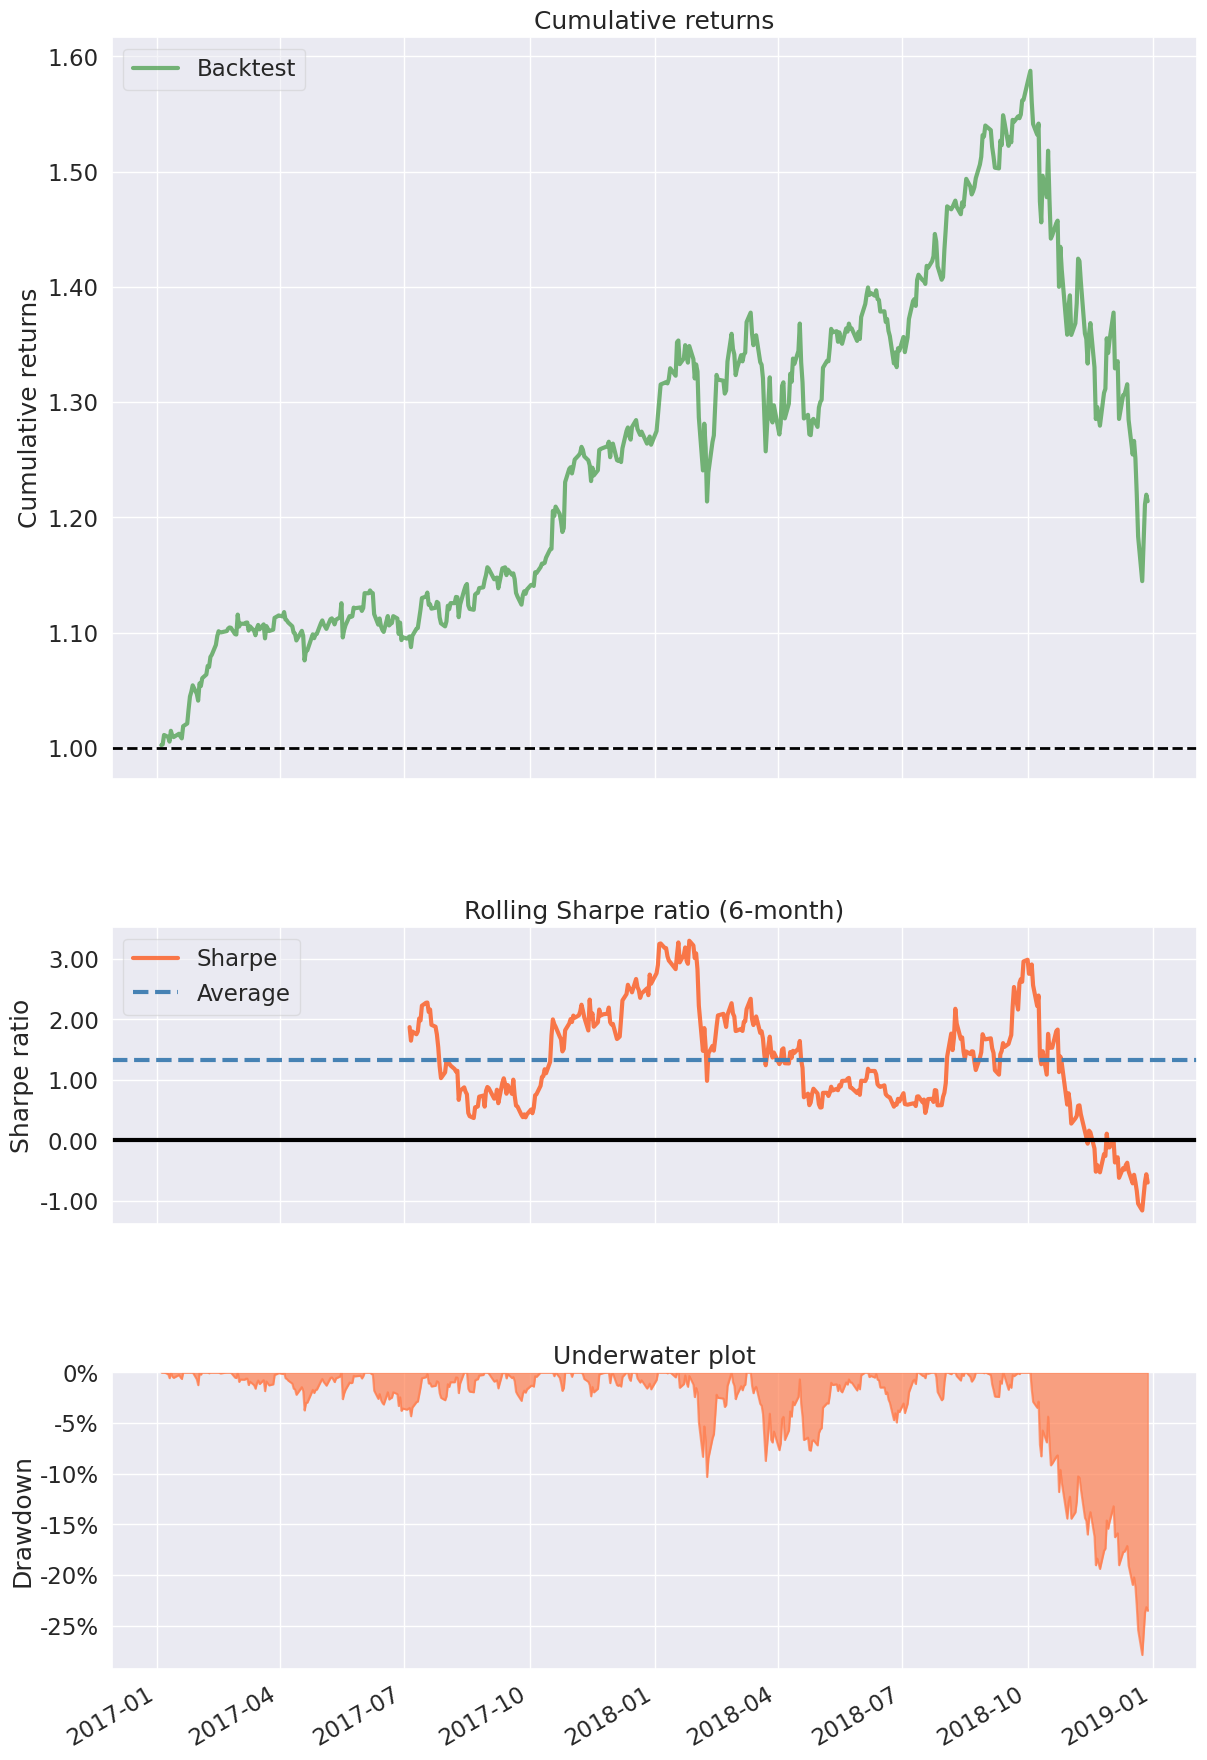

In [18]:
#hoja de lagrimas
pf.create_simple_tear_sheet(portfolio_returns)

### Frontera eficiente

In [4]:
n_portfolios = 10 ** 5
n_days = 252
risky_assets = ['META', 'TSLA', 'MSFT']
risky_assets.sort()
start_date = '2018-01-01'
end_date = '2018-12-31'
n_assets = len(risky_assets)

In [5]:
prices_df = yf.download(risky_assets, start = start_date, end =  end_date)
prices_df

[*********************100%***********************]  3 of 3 completed


Adj Close                             Close              \
                  META       MSFT       TSLA        META        MSFT   
Date                                                                   
2018-01-02  181.419998  80.562057  21.368668  181.419998   85.949997   
2018-01-03  184.669998  80.936974  21.150000  184.669998   86.349998   
2018-01-04  184.330002  81.649353  20.974667  184.330002   87.110001   
2018-01-05  186.850006  82.661636  21.105333  186.850006   88.190002   
2018-01-08  188.279999  82.745995  22.427334  188.279999   88.279999   
...                ...        ...        ...         ...         ...   
2018-12-21  124.949997  93.666153  21.318001  124.949997   98.230003   
2018-12-24  124.059998  89.756638  19.692667  124.059998   94.129997   
2018-12-26  134.179993  95.887886  21.739332  134.179993  100.559998   
2018-12-27  134.520004  96.479088  21.075333  134.520004  101.180000   
2018-12-28  133.199997  95.725777  22.257999  133.199997  100.389999   

                             High                                Low  \
                 TSLA        META        MSFT       TSLA        META   
Date                                                                   
2018-01-02  21.368668  181.580002   86.309998  21.474001  177.550003   
2018-01-03  21.150000  184.779999   86.510002  21.683332  181.330002   
2018-01-04  20.974667  186.210007   87.660004  21.236668  184.100006   
2018-01-05  21.105333  186.899994   88.410004  21.149332  184.929993   
2018-01-08  22.427334  188.899994   88.580002  22.468000  186.330002   
...               ...         ...         ...        ...         ...   
2018-12-21  21.318001  134.899994  103.000000  21.564667  123.419998   
2018-12-24  19.692667  129.740005   97.970001  20.966667  123.019997   
2018-12-26  21.739332  134.240005  100.690002  21.798000  125.889999   
2018-12-27  21.075333  134.990005  101.190002  21.478001  129.669998   
2018-12-28  22.257999  135.919998  102.410004  22.416000  132.199997   

                                        Open                           Volume  \
                 MSFT       TSLA        META        MSFT       TSLA      META   
Date                                                                            
2018-01-02  85.500000  20.733334  177.679993   86.129997  20.799999  18151900   
2018-01-03  85.970001  21.036667  181.880005   86.059998  21.400000  16886600   
2018-01-04  86.570000  20.378668  184.899994   86.589996  20.858000  13880900   
2018-01-05  87.430000  20.799999  185.589996   87.660004  21.108000  13574500   
2018-01-08  87.599998  21.033333  187.199997   88.199997  21.066668  17994700   
...               ...        ...         ...         ...        ...       ...   
2018-12-21  97.459999  20.829332  133.389999  101.629997  21.160000  56901500   
2018-12-24  93.980003  19.680000  123.099998   97.680000  20.900000  22066000   
2018-12-26  93.959999  19.606001  126.000000   95.139999  20.000000  39723400   
2018-12-27  96.400002  20.100000  132.440002   99.300003  21.322666  31202500   
2018-12-28  99.519997  21.227333  135.339996  102.089996  21.540001  22627600   

                                  
                 MSFT       TSLA  
Date                              
2018-01-02   22483800   65283000  
2018-01-03   26061400   67822500  
2018-01-04   21912000  149194500  
2018-01-05   23407100   68868000  
2018-01-08   22113000  147891000  
...               ...        ...  
2018-12-21  111242100  120252000  
2018-12-24   43935200   83398500  
2018-12-26   51634800  122446500  
2018-12-27   49498500  128626500  
2018-12-28   38196300  149085000  

[250 rows x 18 columns]

In [7]:
#rendimientos promedio anualizados con desviacion estandar correspondiente
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * n_days
cov_mat = returns_df.cov() * n_days

In [8]:
avg_returns

META   -0.237618
MSFT    0.214581
TSLA    0.210151
dtype: float64

In [9]:
cov_mat

,META,MSFT,TSLA
META,0.144889,0.059667,0.061845
MSFT,0.059667,0.080394,0.065049
TSLA,0.061845,0.065049,0.344898


In [10]:
#simulacion de ponderaciones del portafolio aleatoriamente
np.random.seed(42)
weights = np.random.random(size=(n_portfolios, n_assets))
weights /= np.sum(weights, axis = 1)[:, np.newaxis]

In [13]:
#metricas del portafolio
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})
portf_results_df

,returns,volatility,sharpe_ratio
0,0.130678,0.324162,0.403125
1,-0.083445,0.326005,-0.255963
2,0.195616,0.336517,0.581297
3,0.023545,0.410601,0.057344
4,-0.092963,0.326375,-0.284835
...,...,...,...
99995,0.200693,0.430978,0.465669
99996,0.017362,0.367448,0.047250
99997,0.143777,0.322994,0.445138
99998,-0.028271,0.363766,-0.077718


In [14]:
#localizar puntos de la frontera eficiente
n_points = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), n_points)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)
for point_index in range(n_points):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matches_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matches_ind]))
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

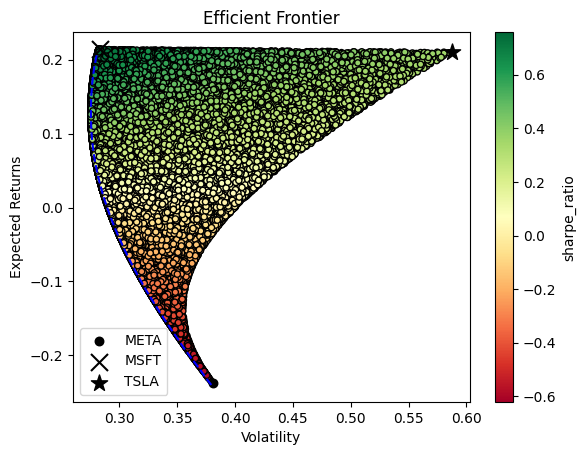

In [16]:
#graficar la frontera
marks = ['.', 'x', '*']
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), y=avg_returns[asset_index], marker=marks[asset_index], 
               s=150, color='black', label=risky_assets[asset_index])
ax.legend()

In [17]:
#portafolio maximo = mayor rendimiento
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

#portafolio minimo = minimo riesgo y volatilidad
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [23]:
print('Maximun sharpe ratio portfolio----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x,y in zip(risky_assets, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}%   ', end="", flush=True )

Maximun sharpe ratio portfolio----
Performance
returns: 21.41% volatility: 28.23% sharpe_ratio: 75.86% 
Weights
META: 0.03%   MSFT: 92.99%   TSLA: 6.98%   

In [24]:
print('Minimun volatility portfolio----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x,y in zip(risky_assets, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}%   ', end="", flush=True )

Minimun volatility portfolio----
Performance
returns: 12.90% volatility: 27.54% sharpe_ratio: 46.84% 
Weights
META: 18.88%   MSFT: 76.94%   TSLA: 4.18%   

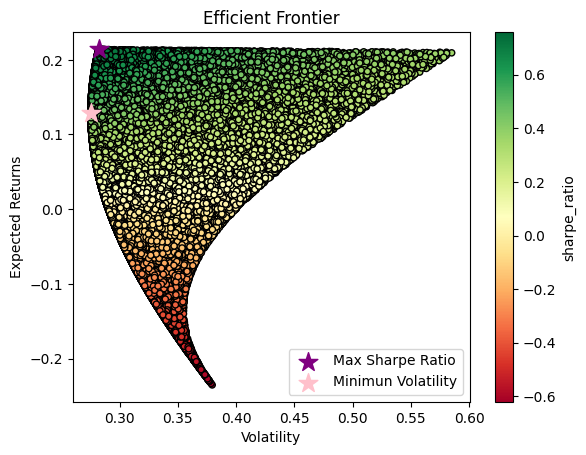

In [32]:
#lo graficamos
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, y=max_sharpe_portf.returns, c='purple', marker='*', s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, y=min_vol_portf.returns, c='pink', marker='*', s=200, label='Minimun Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.legend()